In [0]:
!ls

'My Drive'


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
import sklearn
from sklearn import preprocessing


In [13]:
dt=pd.read_csv("/content/drive/My Drive/wdbc.data")
#print(dt.head())
print(dt.shape)
y=dt.iloc[:,1].values
print(type(y))
print(y.shape)


(568, 32)
<class 'numpy.ndarray'>
(568,)


In [14]:
y_label=[]
for i in y:
    if(i=='M'):
        y_label.append(0)
    else:
        y_label.append(1)
        
ylabel=np.array(y_label)
print(ylabel[0])
print(y[0])

0
M


In [15]:
x=dt.iloc[:,2:].values
print(x.shape)
from sklearn import preprocessing
x=preprocessing.scale(x)

(568, 30)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, ylabel,
                                                    test_size=0.25,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((426, 30), (142, 30), (426,), (142,))

In [0]:
def model_creator(activator,loss_fuc,neurons,c):
    
    model=Sequential()
    model.add(Dense(neurons,input_shape=(30,),activation=activator))
    
    if(c==True):
      model.add(Dense(10,activation='relu'))
      print("extra layer is add of 10 neuron is add")

    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss=loss_fuc,optimizer=Adam(lr=0.001),metrics=['accuracy'])
    earlystopping=EarlyStopping(monitor='val_loss',min_delta=0,patience=15,verbose=1,mode='auto')
    print("activation :{}\n loss :{}\n neurons :{}".format(activator,loss_fuc,neurons))
    history=model.fit(X_train,y_train,epochs=200,validation_split=.22,verbose=1,callbacks=[earlystopping])
    return model
   

In [0]:
activation_list=['relu','tanh','sigmoid']


In [0]:
loss_list=['binary_crossentropy','mean_absolute_error']


In [21]:
count=0
activation_list=['relu']
loss_list=['binary_crossentropy','mean_absolute_error']
activation_fuction_detail=[]
activation_fuction_detail_extra_layer=[]

list_of_all_model=[]
list_of_all_model_with_extra_layer=[]

for activ in activation_list:
  for loss in loss_list:
    for neuron in [5,10,10]:
      count=count+1
      if(count==3):
        model=model_creator(activ,loss,neuron,True)
        list_of_all_model_with_extra_layer.append(model)
        activation_fuction_detail_extra_layer.append("activation: {} loss: {} neuron: {}".format(activ,loss,neuron))
        count=0
      else:
        model=model_creator(activ,loss,neuron,False)
        list_of_all_model.append(model)
        activation_fuction_detail.append("activation: {} loss: {} neuron: {}".format(activ,loss,neuron))

activation :relu
 loss :binary_crossentropy
 neurons :5
Train on 332 samples, validate on 94 samples
Epoch 1/200
332/332 [==============================] - 1s 3ms/sample - loss: 0.7496 - acc: 0.4458 - val_loss: 0.7723 - val_acc: 0.5319
Epoch 2/200
332/332 [==============================] - 0s 110us/sample - loss: 0.6461 - acc: 0.6235 - val_loss: 0.6648 - val_acc: 0.6702
Epoch 3/200
332/332 [==============================] - 0s 111us/sample - loss: 0.5689 - acc: 0.7831 - val_loss: 0.5812 - val_acc: 0.7553
Epoch 4/200
332/332 [==============================] - 0s 111us/sample - loss: 0.5066 - acc: 0.8524 - val_loss: 0.5192 - val_acc: 0.8404
Epoch 5/200
332/332 [==============================] - 0s 112us/sample - loss: 0.4586 - acc: 0.8886 - val_loss: 0.4654 - val_acc: 0.8723
Epoch 6/200
332/332 [==============================] - 0s 106us/sample - loss: 0.4164 - acc: 0.9096 - val_loss: 0.4216 - val_acc: 0.8936
Epoch 7/200
332/332 [==============================] - 0s 110us/sample - loss: 

In [22]:
print(len(list_of_all_model))
print(len(list_of_all_model_with_extra_layer))

4
2


In [23]:
print(len(activation_fuction_detail))
print(len(activation_fuction_detail_extra_layer))

4
2


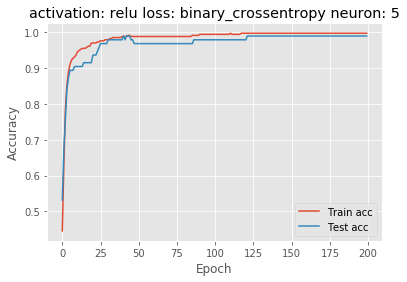

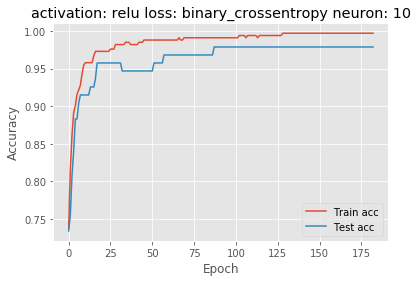

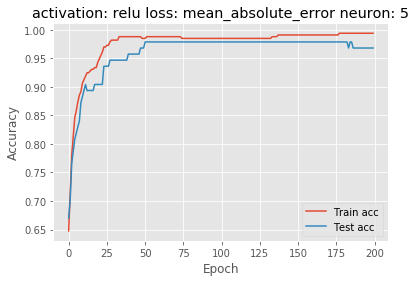

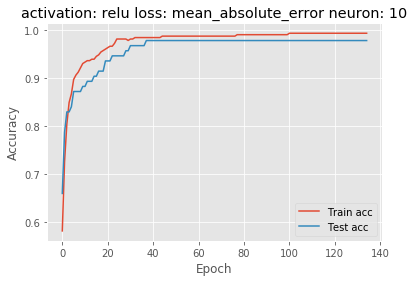

In [59]:
for i,each_model in enumerate(list_of_all_model):
  history=each_model.history
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title(activation_fuction_detail[i])
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train acc', 'Test acc'], loc='best')
  plt.show()

  # Plot training & validation loss values
  #plt.plot(history.history['loss'])
  #plt.plot(history.history['val_loss'])
  #plt.title('Model loss')
  #plt.ylabel('Loss')
  #plt.xlabel('Epoch')
  #plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

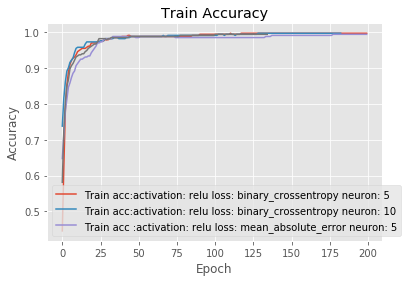

<Figure size 7200x7200 with 0 Axes>

In [53]:


plt.plot(list_of_all_model[0].history.history['acc'])
#plt.plot(list_of_all_model[0].history.history['val_acc'])

plt.plot(list_of_all_model[1].history.history['acc'])
#plt.plot(list_of_all_model[1].history.history['val_acc'])

plt.plot(list_of_all_model[2].history.history['acc'])
#plt.plot(list_of_all_model[2].history.history['val_acc'])

plt.plot(list_of_all_model[3].history.history['acc'])
#plt.plot(list_of_all_model[3].history.history['val_acc'])



plt.title('Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train acc:{}'.format(activation_fuction_detail[0]), 'Train acc:{}'.format(activation_fuction_detail[1]),'Train acc :{}'.format(activation_fuction_detail[2],'Train acc:{}'.format(activation_fuction_detail[3]))], loc='best')
plt.figure(figsize=(100,100))
plt.show()
#plt.savefig('../drive/My Drive/trainACC.png')

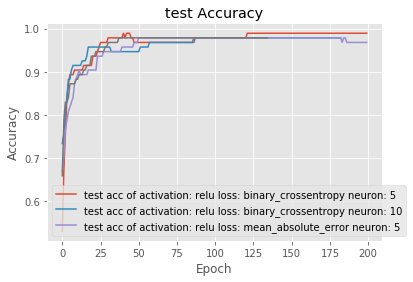

<Figure size 36000x7200 with 0 Axes>

In [55]:


#plt.plot(list_of_all_model[0].history.history['acc'])
plt.plot(list_of_all_model[0].history.history['val_acc'])

#plt.plot(list_of_all_model[1].history.history['acc'])
plt.plot(list_of_all_model[1].history.history['val_acc'])

#plt.plot(list_of_all_model[2].history.history['acc'])
plt.plot(list_of_all_model[2].history.history['val_acc'])

#plt.plot(list_of_all_model[3].history.history['acc'])
plt.plot(list_of_all_model[3].history.history['val_acc'])



plt.title('test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['test acc of {}'.format(activation_fuction_detail[0]), 'test acc of {}'.format(activation_fuction_detail[1]),'test acc of {}'.format(activation_fuction_detail[2],'test acc of {}'.format(activation_fuction_detail[3]))], loc='best')
plt.figure(figsize=(500,100))
plt.show()
#plt.savefig('../drive/My Drive/trainACC.png')

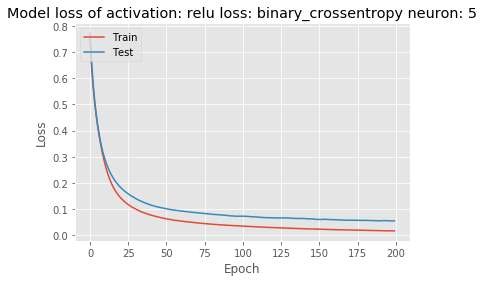

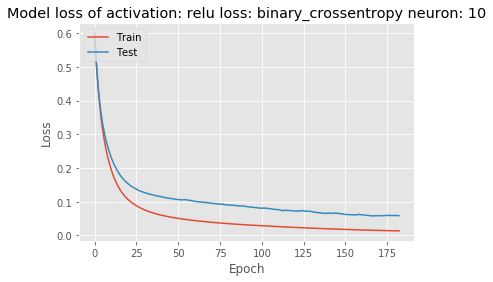

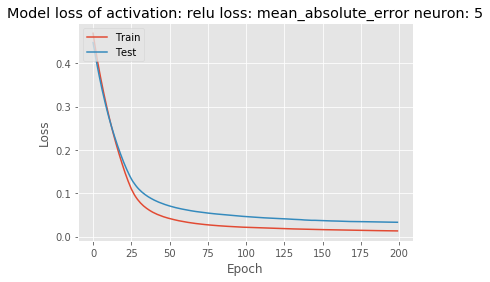

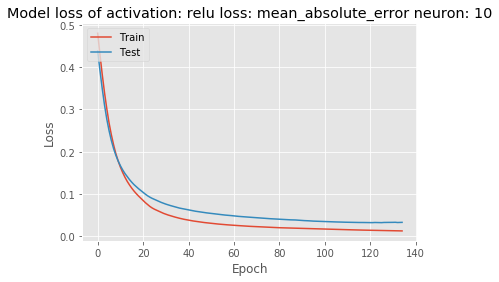

In [60]:
for i,each_model in enumerate(list_of_all_model):
  history=each_model.history
  

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss of {}'.format(activation_fuction_detail[i]))
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [65]:
for i,each_model in enumerate(list_of_all_model):
  loss,acc=each_model.evaluate(X_test,y_test)
  print(activation_fuction_detail[i])
  print('The loss is: {:.4f}'.format(loss*100))
  print('The accuracy is: {:.4f}'.format(acc*100))
  print('-----------')

142/142 [==============================] - 0s 147us/sample - loss: 0.1236 - acc: 0.9718
activation: relu loss: binary_crossentropy neuron: 5
The loss is: 12.3622
The accuracy is: 97.1831
-----------
142/142 [==============================] - 0s 64us/sample - loss: 0.1572 - acc: 0.9648
activation: relu loss: binary_crossentropy neuron: 10
The loss is: 15.7242
The accuracy is: 96.4789
-----------
142/142 [==============================] - 0s 67us/sample - loss: 0.0460 - acc: 0.9577
activation: relu loss: mean_absolute_error neuron: 5
The loss is: 4.6004
The accuracy is: 95.7747
-----------
142/142 [==============================] - 0s 79us/sample - loss: 0.0450 - acc: 0.9648
activation: relu loss: mean_absolute_error neuron: 10
The loss is: 4.4973
The accuracy is: 96.4789
-----------


In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

In [0]:
model_detail=[]

In [71]:
for i,each_model in enumerate(list_of_all_model):
  result=each_model.predict_classes(X_test)
  #print(result)
  cm1 =confusion_matrix(result,y_test)
  print(activation_fuction_detail[i])
  print(cm1 )
  total1=sum(sum(cm1))
  loss,acc=each_model.evaluate(X_test,y_test)
  #print(activation_fuction_detail[i])
  print('The loss is: {:.4f}'.format(loss*100))
  print('The accuracy is: {:.4f}'.format(acc*100))
  print('-----------')
  
#####from confusion matrix calculate accuracy
  accuracy1=(cm1[0,0]+cm1[1,1])/total1
  print ('Accuracy : ', accuracy1)

  sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  print('Sensitivity : ', sensitivity1 )

  specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  print('Specificity : ', specificity1)
  model_detail.append([activation_fuction_detail[i],cm1,loss*100,acc*100,sensitivity1,specificity1])
  print('-----------------')

activation: relu loss: binary_crossentropy neuron: 5
[[52  1]
 [ 3 86]]
142/142 [==============================] - 0s 80us/sample - loss: 0.1236 - acc: 0.9718
The loss is: 12.3622
The accuracy is: 97.1831
-----------
Accuracy :  0.971830985915493
Sensitivity :  0.9811320754716981
Specificity :  0.9662921348314607
-----------------
activation: relu loss: binary_crossentropy neuron: 10
[[52  2]
 [ 3 85]]
142/142 [==============================] - 0s 68us/sample - loss: 0.1572 - acc: 0.9648
The loss is: 15.7242
The accuracy is: 96.4789
-----------
Accuracy :  0.9647887323943662
Sensitivity :  0.9629629629629629
Specificity :  0.9659090909090909
-----------------
activation: relu loss: mean_absolute_error neuron: 5
[[51  2]
 [ 4 85]]
142/142 [==============================] - 0s 75us/sample - loss: 0.0460 - acc: 0.9577
The loss is: 4.6004
The accuracy is: 95.7747
-----------
Accuracy :  0.9577464788732394
Sensitivity :  0.9622641509433962
Specificity :  0.9550561797752809
-----------------

In [83]:
print(model_detail)

[['activation: relu loss: binary_crossentropy neuron: 5', array([[52,  1],
       [ 3, 86]]), 12.362171019571768, 97.183096408844, 0.9811320754716981, 0.9662921348314607], ['activation: relu loss: binary_crossentropy neuron: 10', array([[52,  2],
       [ 3, 85]]), 15.724206114725641, 96.47887349128723, 0.9629629629629629, 0.9659090909090909], ['activation: relu loss: mean_absolute_error neuron: 5', array([[51,  2],
       [ 4, 85]]), 4.6003806967170195, 95.77465057373047, 0.9622641509433962, 0.9550561797752809], ['activation: relu loss: mean_absolute_error neuron: 10', array([[52,  2],
       [ 3, 85]]), 4.497326133464476, 96.47887349128723, 0.9629629629629629, 0.9659090909090909]]


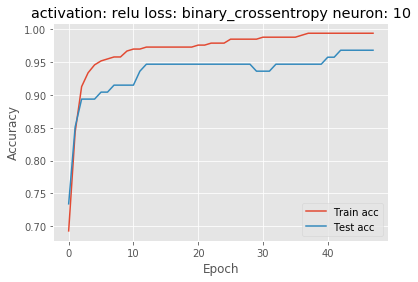

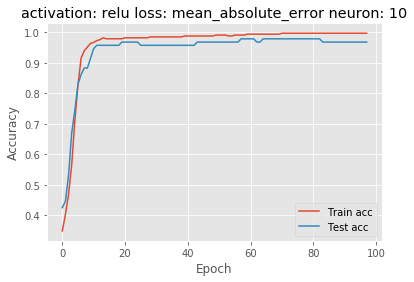

In [74]:
for i,each_model in enumerate(list_of_all_model_with_extra_layer):
  history=each_model.history
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title(activation_fuction_detail_extra_layer[i])
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train acc', 'Test acc'], loc='best')
  
  plt.show()

  # Plot training & validation loss values
  #plt.plot(history.history['loss'])
  #plt.plot(history.history['val_loss'])
  #plt.title('Model loss')
  #plt.ylabel('Loss')
  #plt.xlabel('Epoch')
  #plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

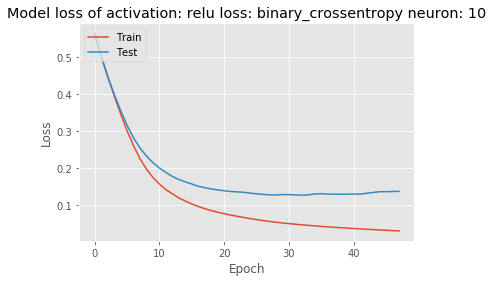

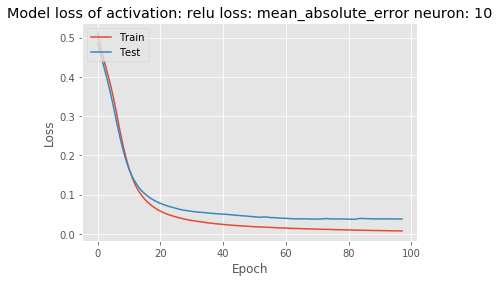

In [75]:
for i,each_model in enumerate(list_of_all_model_with_extra_layer):
  history=each_model.history
  

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss of {}'.format(activation_fuction_detail_extra_layer[i]))
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [0]:
model_detail_extra_layer=[]

In [78]:
for i,each_model in enumerate(list_of_all_model_with_extra_layer):
  result=each_model.predict_classes(X_test)
  #print(result)
  cm1 =confusion_matrix(result,y_test)
  print(activation_fuction_detail[i])
  print(cm1 )
  total1=sum(sum(cm1))
  loss,acc=each_model.evaluate(X_test,y_test)
  #print(activation_fuction_detail[i])
  print('The loss is: {:.4f}'.format(loss*100))
  print('The accuracy is: {:.4f}'.format(acc*100))
  print('-----------')
  
#####from confusion matrix calculate accuracy
  accuracy1=(cm1[0,0]+cm1[1,1])/total1
  print ('Accuracy : ', accuracy1)

  sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  print('Sensitivity : ', sensitivity1 )

  specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  print('Specificity : ', specificity1)
  model_detail_extra_layer.append([activation_fuction_detail_extra_layer[i],cm1,loss*100,acc*100,sensitivity1,specificity1])
  print('-----------------')

activation: relu loss: binary_crossentropy neuron: 5
[[50  2]
 [ 5 85]]
142/142 [==============================] - 0s 88us/sample - loss: 0.1488 - acc: 0.9507
The loss is: 14.8766
The accuracy is: 95.0704
-----------
Accuracy :  0.9507042253521126
Sensitivity :  0.9615384615384616
Specificity :  0.9444444444444444
-----------------
activation: relu loss: binary_crossentropy neuron: 10
[[51  2]
 [ 4 85]]
142/142 [==============================] - 0s 122us/sample - loss: 0.0446 - acc: 0.9577
The loss is: 4.4641
The accuracy is: 95.7747
-----------
Accuracy :  0.9577464788732394
Sensitivity :  0.9622641509433962
Specificity :  0.9550561797752809
-----------------


In [79]:
print(model_detail_extra_layer)

[['activation: relu loss: binary_crossentropy neuron: 10', array([[50,  2],
       [ 5, 85]]), 14.876553727130235, 95.07042169570923, 0.9615384615384616, 0.9444444444444444], ['activation: relu loss: mean_absolute_error neuron: 10', array([[51,  2],
       [ 4, 85]]), 4.464147418235678, 95.77465057373047, 0.9622641509433962, 0.9550561797752809]]


In [82]:
import pickle



with open('/drive/My Drive/model_detail_extra_layer_1.pickle', 'wb') as handle:
    pickle.dump(model_detail_extra_layer, handle)

with open('model_detail_1.pickle', 'wb') as handle:
    pickle.dump(model_detail, handle)


FileNotFoundError: ignored

In [84]:
count=0
activation_list=['tanh']
loss_list=['binary_crossentropy','mean_absolute_error']
activation_fuction_detail=[]
activation_fuction_detail_extra_layer=[]

list_of_all_model=[]
list_of_all_model_with_extra_layer=[]

for activ in activation_list:
  for loss in loss_list:
    for neuron in [5,10,10]:
      count=count+1
      if(count==3):
        model=model_creator(activ,loss,neuron,True)
        list_of_all_model_with_extra_layer.append(model)
        activation_fuction_detail_extra_layer.append("activation: {} loss: {} neuron: {}".format(activ,loss,neuron))
        count=0
      else:
        model=model_creator(activ,loss,neuron,False)
        list_of_all_model.append(model)
        activation_fuction_detail.append("activation: {} loss: {} neuron: {}".format(activ,loss,neuron))

activation :tanh
 loss :binary_crossentropy
 neurons :5
Train on 332 samples, validate on 94 samples
Epoch 1/200
332/332 [==============================] - 0s 737us/sample - loss: 0.5008 - acc: 0.8133 - val_loss: 0.4977 - val_acc: 0.8191
Epoch 2/200
332/332 [==============================] - 0s 127us/sample - loss: 0.4361 - acc: 0.8645 - val_loss: 0.4461 - val_acc: 0.8404
Epoch 3/200
332/332 [==============================] - 0s 112us/sample - loss: 0.3857 - acc: 0.8886 - val_loss: 0.4040 - val_acc: 0.8404
Epoch 4/200
332/332 [==============================] - 0s 119us/sample - loss: 0.3453 - acc: 0.9127 - val_loss: 0.3705 - val_acc: 0.8617
Epoch 5/200
332/332 [==============================] - 0s 116us/sample - loss: 0.3132 - acc: 0.9217 - val_loss: 0.3436 - val_acc: 0.8617
Epoch 6/200
332/332 [==============================] - 0s 113us/sample - loss: 0.2877 - acc: 0.9277 - val_loss: 0.3211 - val_acc: 0.8723
Epoch 7/200
332/332 [==============================] - 0s 110us/sample - loss

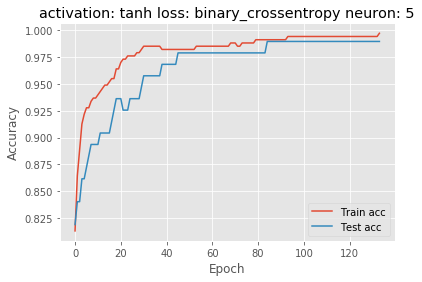

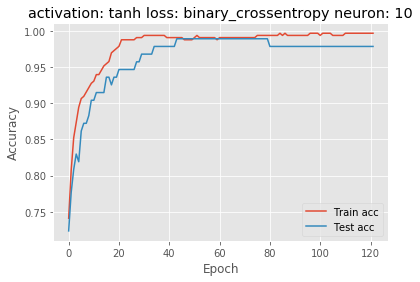

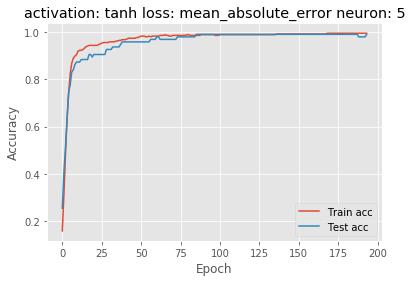

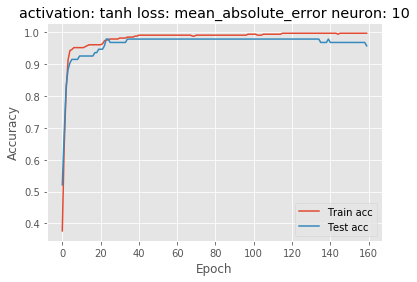

In [85]:
for i,each_model in enumerate(list_of_all_model):
  history=each_model.history
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title(activation_fuction_detail[i])
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train acc', 'Test acc'], loc='best')
  plt.show()

  # Plot training & validation loss values
  #plt.plot(history.history['loss'])
  #plt.plot(history.history['val_loss'])
  #plt.title('Model loss')
  #plt.ylabel('Loss')
  #plt.xlabel('Epoch')
  #plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

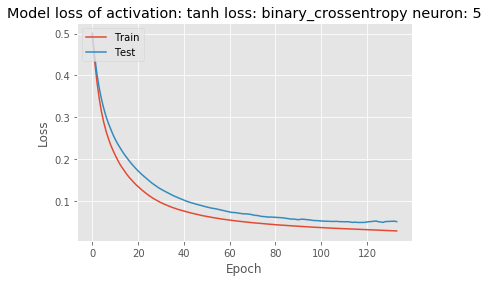

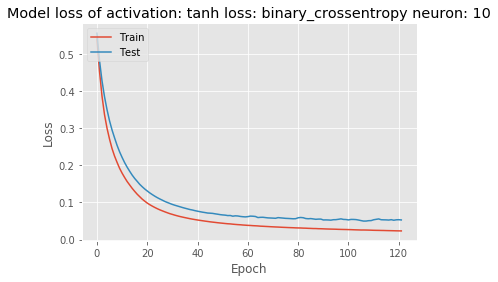

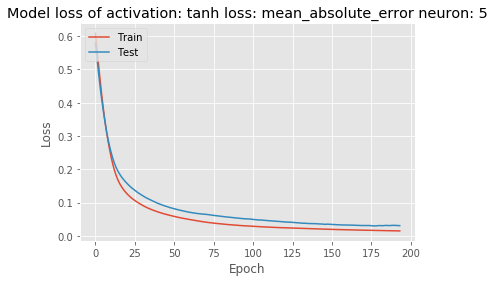

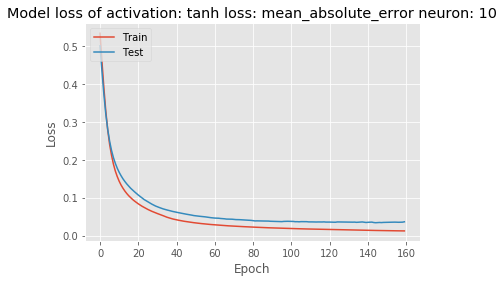

In [86]:
for i,each_model in enumerate(list_of_all_model):
  history=each_model.history
  

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss of {}'.format(activation_fuction_detail[i]))
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [0]:
model_detail_1=[]

In [88]:
for i,each_model in enumerate(list_of_all_model):
  result=each_model.predict_classes(X_test)
  #print(result)
  cm1 =confusion_matrix(result,y_test)
  print(activation_fuction_detail[i])
  print(cm1 )
  total1=sum(sum(cm1))
  loss,acc=each_model.evaluate(X_test,y_test)
  #print(activation_fuction_detail[i])
  print('The loss is: {:.4f}'.format(loss*100))
  print('The accuracy is: {:.4f}'.format(acc*100))
  print('-----------')
  
#####from confusion matrix calculate accuracy
  accuracy1=(cm1[0,0]+cm1[1,1])/total1
  print ('Accuracy : ', accuracy1)

  sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  print('Sensitivity : ', sensitivity1 )

  specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  print('Specificity : ', specificity1)
  model_detail_1.append([activation_fuction_detail[i],cm1,loss*100,acc*100,sensitivity1,specificity1])
  print('-----------------')

activation: tanh loss: binary_crossentropy neuron: 5
[[52  2]
 [ 3 85]]
142/142 [==============================] - 0s 83us/sample - loss: 0.1274 - acc: 0.9648
The loss is: 12.7444
The accuracy is: 96.4789
-----------
Accuracy :  0.9647887323943662
Sensitivity :  0.9629629629629629
Specificity :  0.9659090909090909
-----------------
activation: tanh loss: binary_crossentropy neuron: 10
[[52  1]
 [ 3 86]]
142/142 [==============================] - 0s 94us/sample - loss: 0.1359 - acc: 0.9718
The loss is: 13.5879
The accuracy is: 97.1831
-----------
Accuracy :  0.971830985915493
Sensitivity :  0.9811320754716981
Specificity :  0.9662921348314607
-----------------
activation: tanh loss: mean_absolute_error neuron: 5
[[51  2]
 [ 4 85]]
142/142 [==============================] - 0s 98us/sample - loss: 0.0490 - acc: 0.9577
The loss is: 4.8969
The accuracy is: 95.7747
-----------
Accuracy :  0.9577464788732394
Sensitivity :  0.9622641509433962
Specificity :  0.9550561797752809
-----------------

In [89]:
print(model_detail_1)

[['activation: tanh loss: binary_crossentropy neuron: 5', array([[52,  2],
       [ 3, 85]]), 12.744432602497474, 96.47887349128723, 0.9629629629629629, 0.9659090909090909], ['activation: tanh loss: binary_crossentropy neuron: 10', array([[52,  1],
       [ 3, 86]]), 13.58785613138281, 97.183096408844, 0.9811320754716981, 0.9662921348314607], ['activation: tanh loss: mean_absolute_error neuron: 5', array([[51,  2],
       [ 4, 85]]), 4.896868031773663, 95.77465057373047, 0.9622641509433962, 0.9550561797752809], ['activation: tanh loss: mean_absolute_error neuron: 10', array([[50,  2],
       [ 5, 85]]), 4.591698608603853, 95.07042169570923, 0.9615384615384616, 0.9444444444444444]]


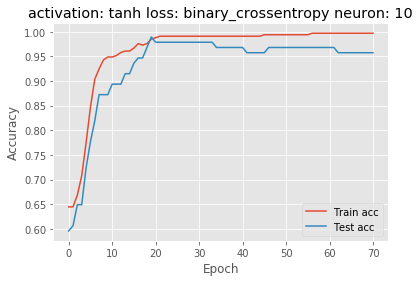

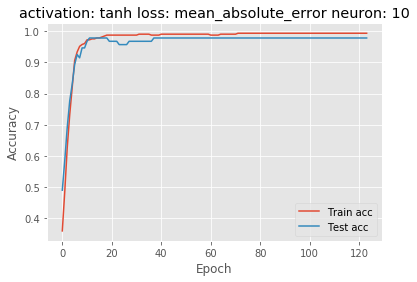

In [90]:
for i,each_model in enumerate(list_of_all_model_with_extra_layer):
  history=each_model.history
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title(activation_fuction_detail_extra_layer[i])
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train acc', 'Test acc'], loc='best')
  
  plt.show()

  # Plot training & validation loss values
  #plt.plot(history.history['loss'])
  #plt.plot(history.history['val_loss'])
  #plt.title('Model loss')
  #plt.ylabel('Loss')
  #plt.xlabel('Epoch')
  #plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

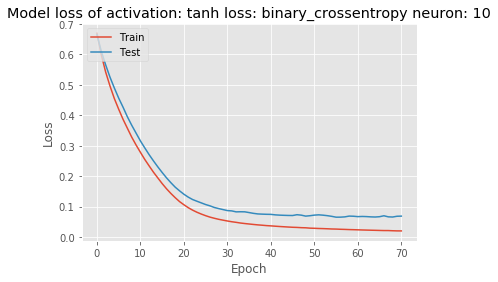

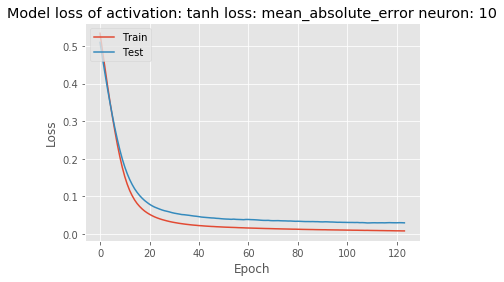

In [91]:
for i,each_model in enumerate(list_of_all_model_with_extra_layer):
  history=each_model.history
  

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss of {}'.format(activation_fuction_detail_extra_layer[i]))
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [0]:
model_detail_extra_layer_1=[]

In [93]:
for i,each_model in enumerate(list_of_all_model_with_extra_layer):
  result=each_model.predict_classes(X_test)
  #print(result)
  cm1 =confusion_matrix(result,y_test)
  print(activation_fuction_detail[i])
  print(cm1 )
  total1=sum(sum(cm1))
  loss,acc=each_model.evaluate(X_test,y_test)
  #print(activation_fuction_detail[i])
  print('The loss is: {:.4f}'.format(loss*100))
  print('The accuracy is: {:.4f}'.format(acc*100))
  print('-----------')
  
#####from confusion matrix calculate accuracy
  accuracy1=(cm1[0,0]+cm1[1,1])/total1
  print ('Accuracy : ', accuracy1)

  sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  print('Sensitivity : ', sensitivity1 )

  specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  print('Specificity : ', specificity1)
  model_detail_extra_layer_1.append([activation_fuction_detail_extra_layer[i],cm1,loss*100,acc*100,sensitivity1,specificity1])
  print('-----------------')

activation: tanh loss: binary_crossentropy neuron: 5
[[51  2]
 [ 4 85]]
142/142 [==============================] - 0s 79us/sample - loss: 0.1461 - acc: 0.9577
The loss is: 14.6108
The accuracy is: 95.7747
-----------
Accuracy :  0.9577464788732394
Sensitivity :  0.9622641509433962
Specificity :  0.9550561797752809
-----------------
activation: tanh loss: binary_crossentropy neuron: 10
[[52  2]
 [ 3 85]]
142/142 [==============================] - 0s 97us/sample - loss: 0.0413 - acc: 0.9648
The loss is: 4.1295
The accuracy is: 96.4789
-----------
Accuracy :  0.9647887323943662
Sensitivity :  0.9629629629629629
Specificity :  0.9659090909090909
-----------------


In [94]:
print(model_detail_extra_layer_1)

[['activation: tanh loss: binary_crossentropy neuron: 10', array([[51,  2],
       [ 4, 85]]), 14.610821569443377, 95.77465057373047, 0.9622641509433962, 0.9550561797752809], ['activation: tanh loss: mean_absolute_error neuron: 10', array([[52,  2],
       [ 3, 85]]), 4.129511327933664, 96.47887349128723, 0.9629629629629629, 0.9659090909090909]]


In [95]:
count=0
activation_list=['sigmoid']
loss_list=['binary_crossentropy','mean_absolute_error']
activation_fuction_detail=[]
activation_fuction_detail_extra_layer=[]

list_of_all_model=[]
list_of_all_model_with_extra_layer=[]

for activ in activation_list:
  for loss in loss_list:
    for neuron in [5,10,10]:
      count=count+1
      if(count==3):
        model=model_creator(activ,loss,neuron,True)
        list_of_all_model_with_extra_layer.append(model)
        activation_fuction_detail_extra_layer.append("activation: {} loss: {} neuron: {}".format(activ,loss,neuron))
        count=0
      else:
        model=model_creator(activ,loss,neuron,False)
        list_of_all_model.append(model)
        activation_fuction_detail.append("activation: {} loss: {} neuron: {}".format(activ,loss,neuron))

activation :sigmoid
 loss :binary_crossentropy
 neurons :5
Train on 332 samples, validate on 94 samples
Epoch 1/200
332/332 [==============================] - 0s 1ms/sample - loss: 0.5912 - acc: 0.6807 - val_loss: 0.5871 - val_acc: 0.7340
Epoch 2/200
332/332 [==============================] - 0s 116us/sample - loss: 0.5495 - acc: 0.7530 - val_loss: 0.5525 - val_acc: 0.7447
Epoch 3/200
332/332 [==============================] - 0s 111us/sample - loss: 0.5133 - acc: 0.7892 - val_loss: 0.5226 - val_acc: 0.7660
Epoch 4/200
332/332 [==============================] - 0s 110us/sample - loss: 0.4820 - acc: 0.8163 - val_loss: 0.4961 - val_acc: 0.7979
Epoch 5/200
332/332 [==============================] - 0s 110us/sample - loss: 0.4549 - acc: 0.8464 - val_loss: 0.4728 - val_acc: 0.7979
Epoch 6/200
332/332 [==============================] - 0s 117us/sample - loss: 0.4310 - acc: 0.8614 - val_loss: 0.4526 - val_acc: 0.8298
Epoch 7/200
332/332 [==============================] - 0s 108us/sample - los

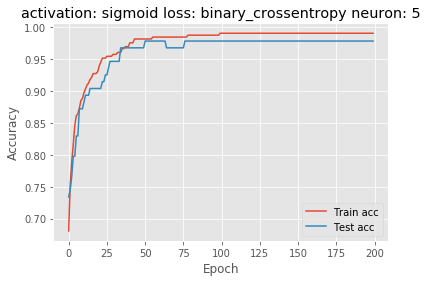

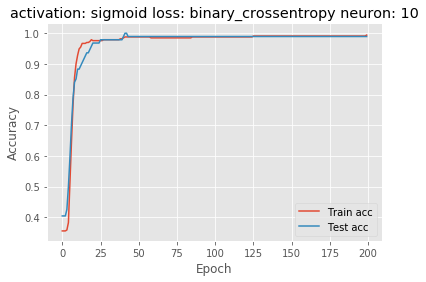

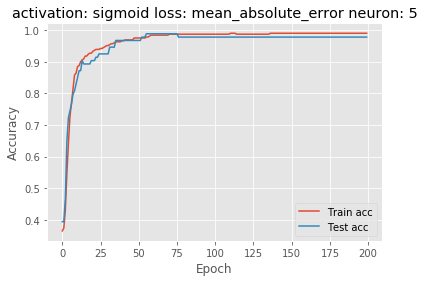

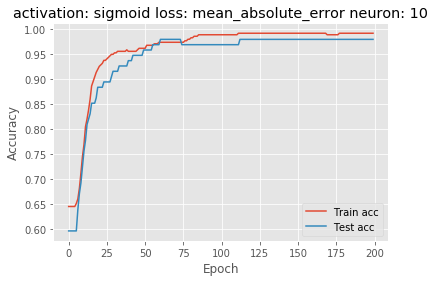

In [96]:
for i,each_model in enumerate(list_of_all_model):
  history=each_model.history
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title(activation_fuction_detail[i])
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train acc', 'Test acc'], loc='best')
  plt.show()

  # Plot training & validation loss values
  #plt.plot(history.history['loss'])
  #plt.plot(history.history['val_loss'])
  #plt.title('Model loss')
  #plt.ylabel('Loss')
  #plt.xlabel('Epoch')
  #plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

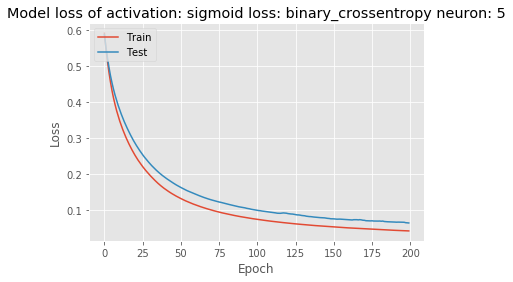

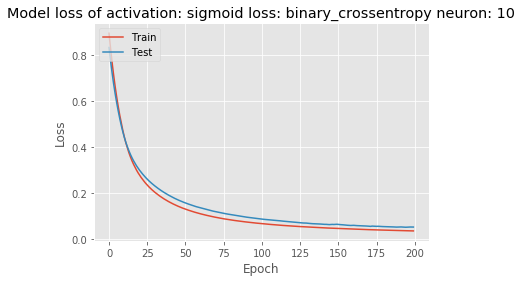

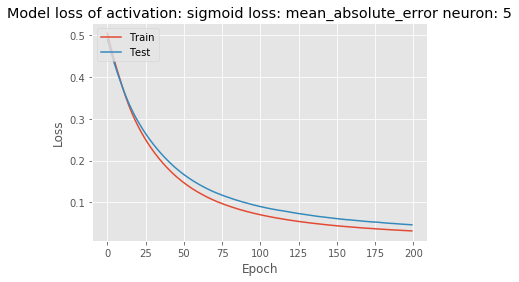

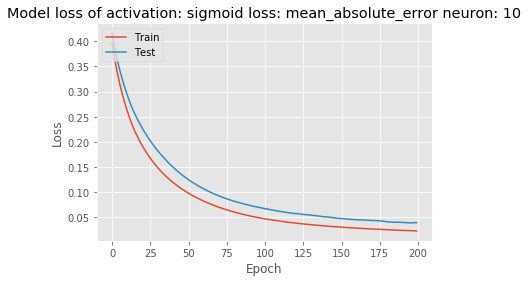

In [97]:
for i,each_model in enumerate(list_of_all_model):
  history=each_model.history
  

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss of {}'.format(activation_fuction_detail[i]))
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [0]:
model_detail_2=[]

In [99]:
for i,each_model in enumerate(list_of_all_model):
  result=each_model.predict_classes(X_test)
  #print(result)
  cm1 =confusion_matrix(result,y_test)
  print(activation_fuction_detail[i])
  print(cm1 )
  total1=sum(sum(cm1))
  loss,acc=each_model.evaluate(X_test,y_test)
  #print(activation_fuction_detail[i])
  print('The loss is: {:.4f}'.format(loss*100))
  print('The accuracy is: {:.4f}'.format(acc*100))
  print('-----------')
  
#####from confusion matrix calculate accuracy
  accuracy1=(cm1[0,0]+cm1[1,1])/total1
  print ('Accuracy : ', accuracy1)

  sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  print('Sensitivity : ', sensitivity1 )

  specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  print('Specificity : ', specificity1)
  model_detail_2.append([activation_fuction_detail[i],cm1,loss*100,acc*100,sensitivity1,specificity1])
  print('-----------------')

activation: sigmoid loss: binary_crossentropy neuron: 5
[[51  2]
 [ 4 85]]
142/142 [==============================] - 0s 90us/sample - loss: 0.1250 - acc: 0.9577
The loss is: 12.4973
The accuracy is: 95.7747
-----------
Accuracy :  0.9577464788732394
Sensitivity :  0.9622641509433962
Specificity :  0.9550561797752809
-----------------
activation: sigmoid loss: binary_crossentropy neuron: 10
[[51  2]
 [ 4 85]]
142/142 [==============================] - 0s 84us/sample - loss: 0.1197 - acc: 0.9577
The loss is: 11.9745
The accuracy is: 95.7747
-----------
Accuracy :  0.9577464788732394
Sensitivity :  0.9622641509433962
Specificity :  0.9550561797752809
-----------------
activation: sigmoid loss: mean_absolute_error neuron: 5
[[52  1]
 [ 3 86]]
142/142 [==============================] - 0s 68us/sample - loss: 0.0574 - acc: 0.9718
The loss is: 5.7404
The accuracy is: 97.1831
-----------
Accuracy :  0.971830985915493
Sensitivity :  0.9811320754716981
Specificity :  0.9662921348314607
--------

In [100]:
print(model_detail_2)

[['activation: sigmoid loss: binary_crossentropy neuron: 5', array([[51,  2],
       [ 4, 85]]), 12.49726815149188, 95.77465057373047, 0.9622641509433962, 0.9550561797752809], ['activation: sigmoid loss: binary_crossentropy neuron: 10', array([[51,  2],
       [ 4, 85]]), 11.974491695807853, 95.77465057373047, 0.9622641509433962, 0.9550561797752809], ['activation: sigmoid loss: mean_absolute_error neuron: 5', array([[52,  1],
       [ 3, 86]]), 5.740431407597703, 97.183096408844, 0.9811320754716981, 0.9662921348314607], ['activation: sigmoid loss: mean_absolute_error neuron: 10', array([[51,  2],
       [ 4, 85]]), 5.441697404562483, 95.77465057373047, 0.9622641509433962, 0.9550561797752809]]


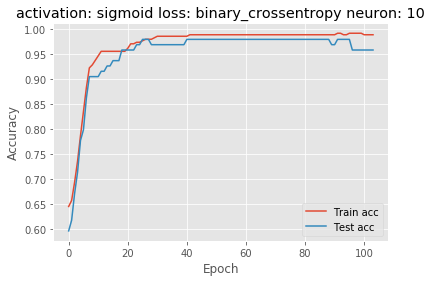

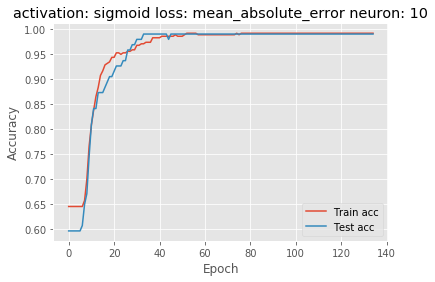

In [101]:
for i,each_model in enumerate(list_of_all_model_with_extra_layer):
  history=each_model.history
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title(activation_fuction_detail_extra_layer[i])
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train acc', 'Test acc'], loc='best')
  
  plt.show()

  # Plot training & validation loss values
  #plt.plot(history.history['loss'])
  #plt.plot(history.history['val_loss'])
  #plt.title('Model loss')
  #plt.ylabel('Loss')
  #plt.xlabel('Epoch')
  #plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

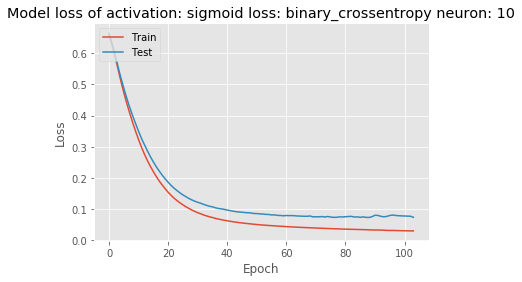

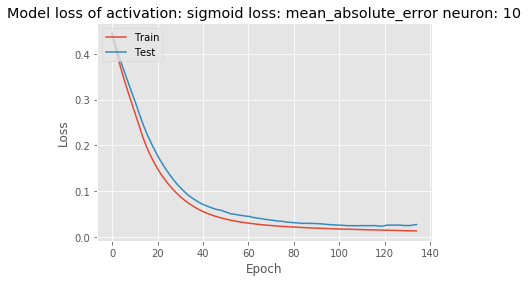

In [102]:
for i,each_model in enumerate(list_of_all_model_with_extra_layer):
  history=each_model.history
  

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss of {}'.format(activation_fuction_detail_extra_layer[i]))
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [0]:
model_detail_extra_layer_2=[]

In [104]:
for i,each_model in enumerate(list_of_all_model_with_extra_layer):
  result=each_model.predict_classes(X_test)
  #print(result)
  cm1 =confusion_matrix(result,y_test)
  print(activation_fuction_detail[i])
  print(cm1 )
  total1=sum(sum(cm1))
  loss,acc=each_model.evaluate(X_test,y_test)
  #print(activation_fuction_detail[i])
  print('The loss is: {:.4f}'.format(loss*100))
  print('The accuracy is: {:.4f}'.format(acc*100))
  print('-----------')
  
#####from confusion matrix calculate accuracy
  accuracy1=(cm1[0,0]+cm1[1,1])/total1
  print ('Accuracy : ', accuracy1)

  sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  print('Sensitivity : ', sensitivity1 )

  specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  print('Specificity : ', specificity1)
  model_detail_extra_layer_2.append([activation_fuction_detail_extra_layer[i],cm1,loss*100,acc*100,sensitivity1,specificity1])
  print('-----------------')

activation: sigmoid loss: binary_crossentropy neuron: 5
[[51  2]
 [ 4 85]]
142/142 [==============================] - 0s 94us/sample - loss: 0.1324 - acc: 0.9577
The loss is: 13.2401
The accuracy is: 95.7747
-----------
Accuracy :  0.9577464788732394
Sensitivity :  0.9622641509433962
Specificity :  0.9550561797752809
-----------------
activation: sigmoid loss: binary_crossentropy neuron: 10
[[51  2]
 [ 4 85]]
142/142 [==============================] - 0s 89us/sample - loss: 0.0443 - acc: 0.9577
The loss is: 4.4324
The accuracy is: 95.7747
-----------
Accuracy :  0.9577464788732394
Sensitivity :  0.9622641509433962
Specificity :  0.9550561797752809
-----------------


In [105]:
print(model_detail_extra_layer_2)

[['activation: sigmoid loss: binary_crossentropy neuron: 10', array([[51,  2],
       [ 4, 85]]), 13.24009010502675, 95.77465057373047, 0.9622641509433962, 0.9550561797752809], ['activation: sigmoid loss: mean_absolute_error neuron: 10', array([[51,  2],
       [ 4, 85]]), 4.432385740268805, 95.77465057373047, 0.9622641509433962, 0.9550561797752809]]
